<a href="https://colab.research.google.com/github/deepakanna/Deep_Learning/blob/main/credit_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif,SelectKBest
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/sample_data/train.csv')
df.head()

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478,target
0,id_1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,id_2,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,...,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,id_3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,0.008333,NaN,NaN,0.0,NaN,NaN,0.0,0.0
3,id_4,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,id_5,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Columns: 5480 entries, id to target
dtypes: float64(5479), object(1)
memory usage: 78.1+ MB


In [ ]:
df.shape

(1868, 5480)

In [ ]:
df.isnull().sum()

id             0
var_1        179
var_2        179
var_3        179
var_4        179
            ... 
var_5475    1798
var_5476    1816
var_5477    1868
var_5478    1694
target         1
Length: 5480, dtype: int64

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
count = np.isinf(df1).values.sum()
print("It contains " + str(count) + " infinite values")
  

It contains 0 infinite values


In [ ]:
np.isinf(df1).values.sum()

0

In [ ]:
df=df.fillna(method='ffill')
df=df.fillna(method='bfill')
df.isnull().sum()

id             0
var_1          0
var_2          0
var_3          0
var_4          0
            ... 
var_5475       0
var_5476       0
var_5477    1868
var_5478       0
target         0
Length: 5480, dtype: int64

In [ ]:
df['var_5477']=df['var_5477'].fillna(df['var_5477'].mode())
df.isnull().sum()

id             0
var_1          0
var_2          0
var_3          0
var_4          0
            ... 
var_5475       0
var_5476       0
var_5477    1868
var_5478       0
target         0
Length: 5480, dtype: int64

In [ ]:
full_null=set(df.columns[df.isnull().mean()>=1])

In [ ]:
df=df.drop(columns=full_null,axis=1)
df.shape

(1868, 5216)

In [ ]:
len(df.columns[df.isnull().mean()>0.5])

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Columns: 5216 entries, id to target
dtypes: float64(5215), object(1)
memory usage: 74.3+ MB


In [ ]:
df.dtypes

id           object
var_1       float64
var_2       float64
var_3       float64
var_4       float64
             ...   
var_5474    float64
var_5475    float64
var_5476    float64
var_5478    float64
target      float64
Length: 5216, dtype: object

In [ ]:
df.groupby('target').sum()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5467,var_5468,var_5469,var_5470,var_5472,var_5473,var_5474,var_5475,var_5476,var_5478
target,,,,,,,,,,,,,,,,,,,,,
0.0,67.406250,3.25,0.333333,1.0,0.0,0.0,3.125,20.00,114.632530,179.075567,...,22.921569,16.872340,34.052632,24.625000,13.470833,19.366667,25.314815,46.884615,75.466667,19.258621
1.0,7.703125,0.50,0.000000,0.0,0.0,0.0,0.250,1.25,18.542169,26.467250,...,3.568627,2.031915,4.947368,3.196429,1.879167,2.666667,3.777778,6.461538,8.533333,2.301724


In [ ]:
df['target'].value_counts()

0.0    1627
1.0     241
Name: target, dtype: int64

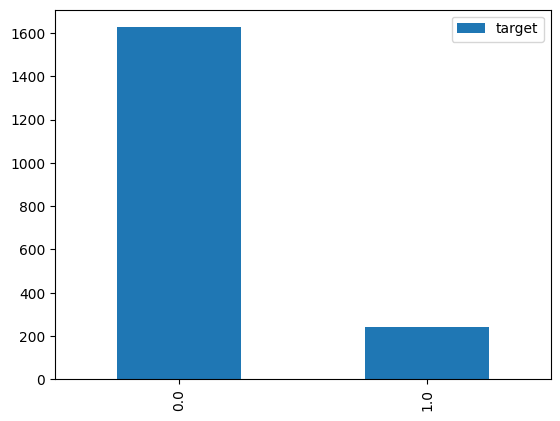

In [ ]:
df['target'].value_counts().plot(kind='bar')
plt.legend()

In [ ]:
#df.corr()>0.7

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5468,var_5469,var_5470,var_5472,var_5473,var_5474,var_5475,var_5476,var_5478,target
var_1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
var_2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
var_3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
var_4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
var_5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_5474,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
var_5475,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
var_5476,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
var_5478,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
import seaborn as sns

In [ ]:
df1=df.drop(columns='id',axis=1)

In [ ]:
columns=df1.columns

In [ ]:
cols=[]
for i in columns:
  if(df1['target'].corr(df1[i])>=0.1):
    print(i)
    cols.append(i)
print(cols)

var_5263
target
['var_5263', 'target']


In [ ]:
count=0
for i in columns:
  if(df1['target'].corr(df1[i])<=-0.1):
    print(i)
    count+=1
    cols.append(i)
print(cols)

var_5214
['var_5263', 'target', 'var_5214']


### The attributes related to the target are identified using the correlation between the attribute and the target attribute. Only the attributes correlated to the target attribute are selected. 

In [ ]:
df2=df1
df2=df2.drop('target',axis=1)
df2.head()


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5467,var_5468,var_5469,var_5470,var_5472,var_5473,var_5474,var_5475,var_5476,var_5478
0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,0.106633,...,0.039216,0.0,0.052632,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,0.106633,...,0.039216,0.0,0.052632,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,0.106633,...,0.039216,0.0,0.052632,0.0,0.008333,0.0,0.0,0.0,0.0,0.0
3,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,0.106633,...,0.039216,0.0,0.052632,0.0,0.008333,0.0,0.0,0.0,0.0,0.0
4,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,0.106633,...,0.039216,0.0,0.052632,0.0,0.008333,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
scaler=StandardScaler()
sc=scaler.fit_transform(df2)
df2_norm=pd.DataFrame(sc,columns=df2.columns)
df2_norm.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5467,var_5468,var_5469,var_5470,var_5472,var_5473,var_5474,var_5475,var_5476,var_5478
0,-0.378887,-0.066941,-0.023143,-0.023143,0.0,0.0,-0.089601,-0.203789,2.710531,-0.360476,...,0.691623,-0.502953,0.858729,-0.359178,-0.453439,-0.571912,-0.567132,-0.584045,-0.441706,-0.400264
1,2.270097,-0.066941,-0.023143,-0.023143,0.0,0.0,-0.089601,-0.203789,0.756598,-0.360476,...,0.691623,-0.502953,0.858729,-0.359178,-0.453439,-0.571912,-0.567132,-0.584045,-0.441706,-0.400264
2,-0.619703,-0.066941,-0.023143,-0.023143,0.0,0.0,-0.089601,-0.203789,0.756598,-0.360476,...,0.691623,-0.502953,0.858729,-0.359178,0.006400,-0.571912,-0.567132,-0.584045,-0.441706,-0.400264
3,1.788464,-0.066941,-0.023143,-0.023143,0.0,0.0,-0.089601,-0.203789,-0.507711,-0.360476,...,0.691623,-0.502953,0.858729,-0.359178,0.006400,-0.571912,-0.567132,-0.584045,-0.441706,-0.400264
4,0.102747,-0.066941,-0.023143,-0.023143,0.0,0.0,-0.089601,-0.203789,0.239381,-0.360476,...,0.691623,-0.502953,0.858729,-0.359178,0.006400,-0.571912,-0.567132,-0.584045,-0.441706,-0.400264


In [190]:
X=df2_norm
df2_norm['target']=df1['target']
y=df2_norm['target']

In [191]:
ss=SelectKBest(f_classif,k=1000)
ss.fit(X,y)
att=ss.get_support(indices=True)
att
ff=X.iloc[:,att]

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   4    5   57 ... 4978 4979 5214] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [192]:
ff.columns

Index(['var_1', 'var_8', 'var_12', 'var_16', 'var_19', 'var_23', 'var_27',
       'var_31', 'var_43', 'var_47',
       ...
       'var_5455', 'var_5456', 'var_5457', 'var_5460', 'var_5461', 'var_5463',
       'var_5468', 'var_5476', 'var_5478', 'target'],
      dtype='object', length=1000)

In [193]:
df_final=df2_norm[ff.columns]
df_final.head()

,var_1,var_8,var_12,var_16,var_19,var_23,var_27,var_31,var_43,var_47,...,var_5455,var_5456,var_5457,var_5460,var_5461,var_5463,var_5468,var_5476,var_5478,target
0,-0.378887,-0.203789,-0.560406,-0.512137,-0.1181,-0.1181,-0.092198,-0.095793,-0.1181,-0.1181,...,-0.607689,-0.496253,-0.464864,-0.537215,0.038390,-0.619378,-0.502953,-0.441706,-0.400264,0.0
1,2.270097,-0.203789,-0.560406,-0.512137,-0.1181,-0.1181,-0.092198,-0.095793,-0.1181,-0.1181,...,-0.607689,1.633866,0.520475,1.419533,0.038390,0.436085,-0.502953,-0.441706,-0.400264,0.0
2,-0.619703,-0.203789,-0.560406,-0.512137,-0.1181,-0.1181,-0.092198,-0.095793,-0.1181,-0.1181,...,0.360384,0.302541,1.083526,0.490077,0.038390,0.858270,-0.502953,-0.441706,-0.400264,0.0
3,1.788464,-0.203789,-0.560406,-0.512137,-0.1181,-0.1181,-0.092198,-0.095793,-0.1181,-0.1181,...,-0.414074,-0.629386,1.083526,-0.732890,0.038390,0.858270,-0.502953,-0.441706,-0.400264,0.0
4,0.102747,-0.203789,-0.560406,-0.512137,-0.1181,-0.1181,-0.092198,-0.095793,-0.1181,-0.1181,...,1.715687,-0.363121,0.238950,0.294403,-0.464857,-0.408286,-0.502953,-0.441706,-0.400264,0.0


In [194]:
y=df_final['target']
X=df_final.drop('target',axis=1)
X

,var_1,var_8,var_12,var_16,var_19,var_23,var_27,var_31,var_43,var_47,...,var_5454,var_5455,var_5456,var_5457,var_5460,var_5461,var_5463,var_5468,var_5476,var_5478
0,-0.378887,-0.203789,-0.560406,-0.512137,-0.1181,-0.1181,-0.092198,-0.095793,-0.1181,-0.1181,...,-0.581256,-0.607689,-0.496253,-0.464864,-0.537215,0.038390,-0.619378,-0.502953,-0.441706,-0.400264
1,2.270097,-0.203789,-0.560406,-0.512137,-0.1181,-0.1181,-0.092198,-0.095793,-0.1181,-0.1181,...,1.590544,-0.607689,1.633866,0.520475,1.419533,0.038390,0.436085,-0.502953,-0.441706,-0.400264
2,-0.619703,-0.203789,-0.560406,-0.512137,-0.1181,-0.1181,-0.092198,-0.095793,-0.1181,-0.1181,...,1.224767,0.360384,0.302541,1.083526,0.490077,0.038390,0.858270,-0.502953,-0.441706,-0.400264
3,1.788464,-0.203789,-0.560406,-0.512137,-0.1181,-0.1181,-0.092198,-0.095793,-0.1181,-0.1181,...,-0.672700,-0.414074,-0.629386,1.083526,-0.732890,0.038390,0.858270,-0.502953,-0.441706,-0.400264
4,0.102747,-0.203789,-0.560406,-0.512137,-0.1181,-0.1181,-0.092198,-0.095793,-0.1181,-0.1181,...,0.356047,1.715687,-0.363121,0.238950,0.294403,-0.464857,-0.408286,-0.502953,-0.441706,-0.400264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,-0.378887,-0.203789,-0.586863,-0.541037,-0.1181,-0.1181,-0.085538,-0.085306,-0.1181,-0.1181,...,-0.398367,-0.220460,-0.363121,-0.605626,-0.439378,-0.464857,-0.408286,0.554465,0.213140,-0.400264
1864,-0.138070,-0.203789,-0.586863,-0.541037,-0.1181,-0.1181,-0.085538,-0.085306,-0.1181,-0.1181,...,1.819155,0.747614,0.835071,0.661238,3.963305,0.038390,0.224992,0.554465,0.867986,0.496609
1865,-0.138070,-0.203789,-0.586863,-0.541037,-0.1181,-0.1181,-0.085538,-0.085306,-0.1181,-0.1181,...,-0.809866,-0.220460,-0.496253,-0.324101,-0.439378,0.038390,0.224992,0.554465,0.867986,0.496609
1866,-0.619703,-0.203789,-0.586863,-0.541037,-0.1181,-0.1181,-0.085538,-0.085306,-0.1181,-0.1181,...,-0.878449,-0.607689,-0.762518,-0.324101,-0.635053,0.038390,-0.619378,0.554465,0.867986,0.496609


In [195]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,var_113,var_169,var_300,var_336,var_445,var_869,var_1107,var_1113,var_1116,var_1119,...,var_5401,var_5407,var_5408,var_5412,var_5419,var_5420,var_5421,var_5424,var_5427,var_5430
1134,1.135099,-0.06133,0.442136,-0.298235,-0.322783,-1.156101,-0.281984,-0.230361,-0.353139,-0.482409,...,0.827918,0.777874,-0.412301,-0.539342,0.947120,-0.288321,2.059381,-0.469934,0.920069,-0.409659
244,1.135099,-0.06133,0.616305,-0.298235,-0.322783,1.084098,-0.311671,-0.263254,-0.962072,0.545116,...,-0.349432,-0.345369,2.818780,2.133616,-0.355022,2.746903,2.059381,2.345097,0.215038,0.960740
1157,0.616788,-0.06133,0.093798,-0.298235,5.271486,-1.156101,-0.143892,-0.246381,-0.619547,-0.482409,...,0.909115,0.063083,3.564413,2.775126,0.296049,4.939009,3.355951,4.351212,6.736571,7.999611
1245,-1.024528,-0.06133,0.267967,3.272938,1.445047,-1.156101,-0.196238,-0.244844,-0.277023,-0.482409,...,-0.105842,-0.651708,-0.722981,-0.624877,-0.615450,-0.625568,-0.447321,-0.534647,-0.313735,-0.534241
721,1.264677,-0.06133,0.529221,-0.298235,0.230420,-1.156101,-0.135249,-0.117118,-0.657606,-0.482409,...,-0.552423,-0.549595,0.084789,-0.261355,0.816906,-0.035386,-0.188007,-0.308151,0.038780,-0.285078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.724770,-0.06133,0.289738,-0.298235,-0.222515,-1.156101,-0.156192,-0.205487,0.522201,0.545116,...,-0.796013,0.063083,-0.660845,-0.667644,-0.224808,-0.625568,-0.533759,-0.631717,-0.666250,-0.658823
1294,1.113503,-0.06133,-0.842362,-0.298235,0.258080,-1.179059,-0.310814,-0.264399,-0.847897,-0.482409,...,0.178346,-0.345369,-0.412301,-0.154436,-0.224808,-0.288321,-0.015131,-0.016940,0.391296,0.337831
860,0.573596,-0.06133,0.311509,-0.298235,0.639495,-1.156101,0.125562,-0.040765,2.767640,-0.482409,...,-0.877210,-0.651708,-0.722981,-0.624877,1.207548,-0.625568,-0.533759,-0.567004,-0.313735,-0.409659
1459,1.135099,-0.06133,-0.428710,1.487351,-0.322783,0.319532,-0.226596,-0.261847,0.331910,-0.482409,...,-0.430629,-0.345369,-0.598709,-0.389657,-0.355022,-0.456944,-0.360883,-0.372864,-0.137477,-0.347368


In [ ]:
X_test

,var_113,var_169,var_300,var_336,var_445,var_869,var_1107,var_1113,var_1116,var_1119,...,var_5401,var_5407,var_5408,var_5412,var_5419,var_5420,var_5421,var_5424,var_5427,var_5430
1699,1.135099,-0.06133,-1.386640,-0.298235,-0.133864,0.319532,-0.239252,-0.264399,2.653465,-0.482409,...,2.127063,1.696891,1.141103,1.128584,1.598191,0.723420,0.935687,0.921403,0.215038,0.213250
1682,-0.722180,-0.06133,0.398594,-0.298235,-0.322783,0.319532,-0.269775,-0.237492,0.255793,0.545116,...,0.097149,0.063083,-0.101620,0.273237,0.035621,-0.119697,-0.188007,0.306626,-0.489993,0.026377
921,1.135099,-0.06133,-0.646421,-0.298235,-0.322783,-1.156101,-0.292338,-0.258428,-0.353139,-0.482409,...,1.721080,0.369422,-0.474437,-0.197204,-0.094593,-0.372633,0.071307,-0.243437,0.567553,-0.035914
275,-1.024528,-0.06133,-1.560810,-0.298235,-0.322783,1.084098,-0.283893,-0.264399,0.408026,-0.482409,...,-0.755415,-0.549595,-0.660845,-0.582110,-0.485236,-0.625568,-0.447321,-0.567004,-0.313735,-0.409659
416,-1.024528,-0.06133,-1.560810,-0.298235,-0.322783,1.084098,-0.076526,-0.264399,0.826667,-0.482409,...,0.990311,2.309569,0.892559,1.000282,0.426263,0.807732,0.157745,0.371340,0.038780,-0.285078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,-0.376640,-0.06133,0.725161,-0.298235,-0.322783,1.084098,-0.256690,-0.219397,-0.391198,-0.482409,...,-0.674218,-0.549595,-0.039484,-0.111669,-0.485236,-0.119697,0.071307,-0.114011,0.215038,0.088668
1364,0.703174,-0.06133,0.529221,-0.298235,0.725372,-1.179059,0.030330,-0.104218,1.283367,0.545116,...,-0.674218,-0.651708,-0.350165,-0.560726,-0.615450,-0.372633,-0.706635,-0.534647,-0.666250,-0.347368
374,-0.592603,-0.06133,-0.450481,-0.298235,0.545054,1.084098,-0.117491,-0.059024,4.061622,-0.482409,...,-0.836611,0.165196,-0.785118,-0.753179,0.035621,-0.709880,-0.620197,-0.761144,-0.666250,-0.721114
271,-1.024528,-0.06133,0.507450,1.487351,-0.322783,1.084098,-0.302628,-0.252126,-0.695664,-0.482409,...,-0.714817,-0.549595,-0.660845,-0.646261,-0.485236,-0.625568,-0.447321,-0.631717,-0.313735,-0.534241


In [ ]:
y_train

1134    0.0
244     1.0
1157    0.0
1245    0.0
721     1.0
       ... 
1130    0.0
1294    0.0
860     0.0
1459    0.0
1126    0.0
Name: target, Length: 1494, dtype: float64

In [196]:
y1=df2_norm['target']
X1=df2_norm.drop('target',axis=1)

In [197]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=42)

In [265]:
from sklearn.svm import SVC
clf=SVC(kernel='poly',class_weight='balanced').fit(x1_train,y1_train)

In [266]:
pred=clf.predict(x1_test)

In [267]:
from sklearn.metrics import accuracy_score,roc_auc_score
print(accuracy_score(pred,y1_test))
print(roc_auc_score(pred,y1_test))

0.8262032085561497
0.5602941176470588


In [236]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [237]:
model.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['AUC'])

In [239]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_257 (Dense)           (None, 16)                83440     
                                                                 
 dense_258 (Dense)           (None, 32)                544       
                                                                 
 dropout_26 (Dropout)        (None, 32)                0         
                                                                 
 dense_259 (Dense)           (None, 64)                2112      
                                                                 
 dense_260 (Dense)           (None, 128)               8320      
                                                                 
 dropout_27 (Dropout)        (None, 128)               0         
                                                                 
 dense_261 (Dense)           (None, 512)             

In [235]:
model.fit(X_train,y_train,epochs=70,validation_data=(X_test,y_test),batch_size=400)

Epoch 1/70
4/4 [==============================] - 3s 234ms/step - loss: 0.5761 - auc: 0.4913 - val_loss: 0.4471 - val_auc: 0.4461
Epoch 2/70
4/4 [==============================] - 0s 24ms/step - loss: 0.4363 - auc: 0.5534 - val_loss: 0.4150 - val_auc: 0.4702
Epoch 3/70
4/4 [==============================] - 0s 19ms/step - loss: 0.4322 - auc: 0.5950 - val_loss: 0.4097 - val_auc: 0.4918
Epoch 4/70
4/4 [==============================] - 0s 23ms/step - loss: 0.3830 - auc: 0.6680 - val_loss: 0.4137 - val_auc: 0.5134
Epoch 5/70
4/4 [==============================] - 0s 18ms/step - loss: 0.3717 - auc: 0.6890 - val_loss: 0.4242 - val_auc: 0.5359
Epoch 6/70
4/4 [==============================] - 0s 22ms/step - loss: 0.3578 - auc: 0.7335 - val_loss: 0.4196 - val_auc: 0.5488
Epoch 7/70
4/4 [==============================] - 0s 17ms/step - loss: 0.3364 - auc: 0.7672 - val_loss: 0.4080 - val_auc: 0.5522
Epoch 8/70
4/4 [==============================] - 0s 17ms/step - loss: 0.3157 - auc: 0.8168 - va

In [238]:
model.fit(x1_train,y1_train,epochs=50,validation_data=(x1_test,y1_test),batch_size=512)

Epoch 1/50
3/3 [==============================] - 3s 175ms/step - loss: 0.6184 - auc: 0.4976 - val_loss: 0.5116 - val_auc: 0.4918
Epoch 2/50
3/3 [==============================] - 0s 36ms/step - loss: 0.4276 - auc: 0.5604 - val_loss: 0.4080 - val_auc: 0.4962
Epoch 3/50
3/3 [==============================] - 0s 40ms/step - loss: 0.3812 - auc: 0.6748 - val_loss: 0.4078 - val_auc: 0.5080
Epoch 4/50
3/3 [==============================] - 0s 39ms/step - loss: 0.3665 - auc: 0.7412 - val_loss: 0.4008 - val_auc: 0.5299
Epoch 5/50
3/3 [==============================] - 0s 39ms/step - loss: 0.3296 - auc: 0.7863 - val_loss: 0.4012 - val_auc: 0.5428
Epoch 6/50
3/3 [==============================] - 0s 36ms/step - loss: 0.3081 - auc: 0.8242 - val_loss: 0.4077 - val_auc: 0.5454
Epoch 7/50
3/3 [==============================] - 0s 38ms/step - loss: 0.2831 - auc: 0.8852 - val_loss: 0.4091 - val_auc: 0.5461
Epoch 8/50
3/3 [==============================] - 0s 36ms/step - loss: 0.2734 - auc: 0.8967 - va